<a href="https://colab.research.google.com/github/joonabetter/genai/blob/main/meow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import Counter
import re
import random


def tokenize(text):

    return re.findall(r"\b\w+\b", text.lower())

corpus = """Natural language processing enables computers to understand human language.
Word embeddings map words into continuous vector space.
Neural networks can be used to learn these embeddings from context words in a document corpus."""
tokens = tokenize(corpus)


word_counts = Counter(tokens)
vocab = {w: i for i, (w, _) in enumerate(word_counts.items())}
id2word = {i: w for w, i in vocab.items()}
vocab_size = len(vocab)


def generate_pairs(tokens, window_size=2):
    pairs = []
    for i, center in enumerate(tokens):
        for j in range(max(0, i - window_size), min(len(tokens), i + window_size + 1)):
            if i != j:
                pairs.append((center, tokens[j]))
    return pairs

pairs = generate_pairs(tokens, window_size=2)
print("Sample training pairs:", pairs[:10])


training_data = [(vocab[c], vocab[o]) for c, o in pairs]


class Word2Vec(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super(Word2Vec, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embed_dim)  # input layer
        self.output = nn.Linear(embed_dim, vocab_size)        # output layer

    def forward(self, center_word):
        embed = self.embeddings(center_word)
        out = self.output(embed)
        return out


embed_dim = 50
model = Word2Vec(vocab_size, embed_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(50):
    total_loss = 0
    for center, context in training_data:
        center_tensor = torch.tensor([center], dtype=torch.long)
        context_tensor = torch.tensor([context], dtype=torch.long)

        optimizer.zero_grad()
        output = model(center_tensor)
        loss = criterion(output, context_tensor)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


embeddings = model.embeddings.weight.data
print("\nWord Embedding for 'language':\n", embeddings[vocab["language"]])
print("\nWord Embedding for 'neural':\n", embeddings[vocab["neural"]])

Sample training pairs: [('natural', 'language'), ('natural', 'processing'), ('language', 'natural'), ('language', 'processing'), ('language', 'enables'), ('processing', 'natural'), ('processing', 'language'), ('processing', 'enables'), ('processing', 'computers'), ('enables', 'language')]
Epoch 10, Loss: 268.7639
Epoch 20, Loss: 250.6068
Epoch 30, Loss: 242.5198
Epoch 40, Loss: 236.5547
Epoch 50, Loss: 233.6128

Word Embedding for 'language':
 tensor([-0.3066, -0.2565,  0.0826, -0.0904, -0.5285, -0.0507,  0.2535,  0.0856,
        -0.8901, -0.2465,  0.0904,  0.2145, -0.0532, -0.1152, -0.3026, -0.0721,
         0.0305, -1.1707, -1.0094,  0.0068, -0.8469, -0.2953,  0.2316, -0.0545,
        -0.0042,  0.0344, -0.1632,  0.6868, -0.7392, -0.0462,  0.0681,  0.0028,
         0.2852,  0.0069,  0.3741, -0.7941,  0.2740,  0.3111, -0.0586,  0.0617,
        -0.0194,  0.1635,  0.2256, -0.0353,  1.0974, -0.1038, -0.0798,  0.0040,
        -0.1110, -0.1202])

Word Embedding for 'neural':
 tensor([-1.179

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

class DeepNN(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, num_classes):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)  # input → hidden1
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)     # hidden1 → hidden2
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2, num_classes) # hidden2 → output

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out


input_size = X.shape[1]
hidden1, hidden2 = 16, 8
num_classes = 3
model = DeepNN(input_size, hidden1, hidden2, num_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)

print("\nClassification Accuracy on Test Data: {:.2f}%".format(accuracy * 100))

Epoch [10/100], Loss: 0.7963
Epoch [20/100], Loss: 0.4763
Epoch [30/100], Loss: 0.3540
Epoch [40/100], Loss: 0.2268
Epoch [50/100], Loss: 0.1244
Epoch [60/100], Loss: 0.0755
Epoch [70/100], Loss: 0.0597
Epoch [80/100], Loss: 0.0531
Epoch [90/100], Loss: 0.0500
Epoch [100/100], Loss: 0.0482

Classification Accuracy on Test Data: 100.00%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose([transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                          download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=64, shuffle=False)


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)   # 1→16
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # 16→32
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 classes (digits 0-9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))   # [1,28,28] → [16,14,14]
        x = self.pool(F.relu(self.conv2(x)))   # [16,14,14] → [32,7,7]
        x = x.view(-1, 32 * 7 * 7)             # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
-
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")


correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nTest Accuracy: {100 * correct / total:.2f}%")

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 337kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.22MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.08MB/s]


Epoch 1/5, Loss: 0.2443
Epoch 2/5, Loss: 0.0667
Epoch 3/5, Loss: 0.0456
Epoch 4/5, Loss: 0.0347
Epoch 5/5, Loss: 0.0279

Test Accuracy: 98.90%


Epoch 1/10, Loss: 0.0616
Epoch 2/10, Loss: 0.0329
Epoch 3/10, Loss: 0.0263
Epoch 4/10, Loss: 0.0227
Epoch 5/10, Loss: 0.0204
Epoch 6/10, Loss: 0.0189
Epoch 7/10, Loss: 0.0174
Epoch 8/10, Loss: 0.0162
Epoch 9/10, Loss: 0.0153
Epoch 10/10, Loss: 0.0145


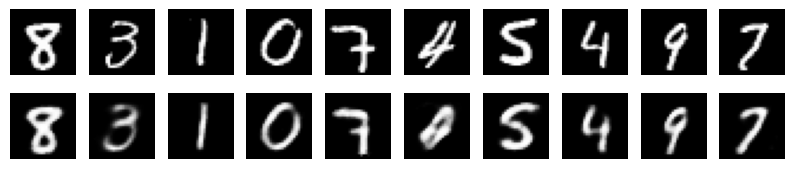

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


transform = transforms.Compose([transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=128, shuffle=True)


class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 32)
        )

        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, _ in train_loader:
        images = images.view(-1, 28*28).to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")


test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                          download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=10, shuffle=True)


model.eval()
with torch.no_grad():
    images, _ = next(iter(test_loader))
    images = images.view(-1, 28*28).to(device)
    outputs = model(images)


    images = images.view(-1, 1, 28, 28).cpu()
    outputs = outputs.view(-1, 1, 28, 28).cpu()


    fig, axes = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(10):

        axes[0][i].imshow(images[i].squeeze(), cmap='gray')
        axes[0][i].axis("off")

        axes[1][i].imshow(outputs[i].squeeze(), cmap='gray')
        axes[1][i].axis("off")
    plt.show()

In [11]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

print("Step 1: Loading dataset ...")
data = fetch_20newsgroups(subset='all')
texts, labels = data.data, data.target
num_classes = len(set(labels))
print(f"Loaded {len(texts)} documents across {num_classes} classes.")

print("\nStep 2: Preprocessing text ...")
MAX_WORDS = 10000
MAX_LEN = 300

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=MAX_LEN)
y = to_categorical(labels, num_classes=num_classes)
print("Text converted to padded sequences.")

print("\nStep 3: Splitting into train and test ...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

print("\nStep 4: Building deep learning model ...")
model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
    LSTM(128),
    Dense(num_classes, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
print(model.summary())

print("\nStep 5: Training model ...")
history = model.fit(X_train, y_train,
          epochs=5,
          batch_size=64,
          validation_split=0.1,
          verbose=2)

print("\nStep 6: Evaluating model on test set ...")
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

Step 1: Loading dataset ...
Loaded 18846 documents across 20 classes.

Step 2: Preprocessing text ...
Text converted to padded sequences.

Step 3: Splitting into train and test ...
Training samples: 15076, Testing samples: 3770

Step 4: Building deep learning model ...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None

Step 5: Training model ...
Epoch 1/5
212/212 - 8s - 39ms/step - accuracy: 0.1498 - loss: 2.7203 - val_accuracy: 0.2162 - val_loss: 2.4621
Epoch 2/5
212/212 - 4s - 19ms/step - accuracy: 0.3986 - loss: 1.8691 - val_accuracy: 0.4562 - val_loss: 1.6757
Epoch 3/5
212/212 - 4s - 17ms/step - accuracy: 0.5321 - loss: 1.5287 - val_accuracy: 0.4377 - val_loss: 1.8362
Epoch 4/5
212/212 - 4s - 18ms/step - accuracy: 0.6087 - loss: 1.2428 - val_accuracy: 0.5424 - val_loss: 1.4586
Epoch 5/5
212/212 - 4s - 19ms/step - accuracy: 0.6956 - loss: 0.9605 - val_accuracy: 0.5829 - val_loss: 1.2705

Step 6: Evaluating model on test set ...
Test Accuracy: 0.5910


In [13]:

import numpy as np, tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10


(x_train,y_train),(x_test,y_test)=cifar10.load_data()
idx_train = np.isin(y_train.flatten(), [0,1])
idx_test  = np.isin(y_test.flatten(), [0,1])
x_train,y_train = x_train[idx_train], (y_train[idx_train]==1).astype("float32")
x_test, y_test  = x_test[idx_test],  (y_test[idx_test]==1).astype("float32")


x_train = preprocess_input(tf.image.resize(x_train, (96,96)).numpy())
x_test  = preprocess_input(tf.image.resize(x_test,  (96,96)).numpy())


base = MobileNetV2(weights="imagenet", include_top=False, input_shape=(96,96,3))
base.trainable = False
x = GlobalAveragePooling2D()(base.output)
out = Dense(1, activation="sigmoid")(x)
model = Model(base.input, out)


model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=32, validation_split=0.1, verbose=1)


print("Test accuracy:", model.evaluate(x_test, y_test, verbose=0)[1])


sample = x_test[0:1]
pred = model.predict(sample)[0][0]
label = "automobile" if pred > 0.5 else "airplane"

print("Predicted:", label)


Epoch 1/3
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.8939 - loss: 0.2353 - val_accuracy: 0.9810 - val_loss: 0.0546
Epoch 2/3
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9807 - loss: 0.0509 - val_accuracy: 0.9850 - val_loss: 0.0423
Epoch 3/3
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9856 - loss: 0.0392 - val_accuracy: 0.9850 - val_loss: 0.0375
Test accuracy: 0.984499990940094
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted: airplane
